# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OBSERVABLE TRENDS:

Trend 1:  The relationship between the latitude and temperature trend with similarities of a parabola. The center is close to the zero degrees latitude and has higher temperature as you trend towards the absolute values of the latitude.

Trend 2:  Based on the data, all locations appear to have some level of humidity heavily concentrated from 2% to 10%.

Trend 3:  At 20 degree longitude appear to have the highest temperature and the most variation of humidity

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
#from config import api_key***PLEASE ENTER YOUR CODE. MY CODE IS NOT INCLUDED.  API_KEY BELOW WILL NOT WORK.  THANK YOU***
from api_keys import api_key
#print (api_key)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

print (lat_lngs)


## Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
       cities.append(city)
    
# Print the city count to confirm sufficient count
#len(cities)
#print (cities)

# Create a df to lat, lng 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

# Randomly select a list of 2000 cities.
for x in range (2000):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat,lng)
    cities_df = cities_df.append({"City":city.city_name,"Country": city.country_code,}, ignore_index=True)

#Check for duplicate cities and delete
cities_df = cities_df.drop_duplicates(subset='City').reset_index()

# Print the city count to confirm sufficient count
cities_df.count()


index      755
City       755
Country    755
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Column variable for final df needed to house data from the API calls.
column_names = ["City", "Country","Temperature (F)", "Latitude",
                "Longitude","Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]

final_cities_df = pd.DataFrame(columns=column_names)

row_count = 1

print("Beginning Data Retrieval")
# Target URL use to loop through the list of cities/add the data to the final df
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    
    if city_data["cod"] == "404":
        print("City not found. Skipping...")
        
        
    else:
        final_cities_df.set_value(index, "City", city_data["name"])
        final_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        
        final_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        
        final_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        final_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        
        final_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        final_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        final_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("Processing Record " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])

        row_count += 1
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval


C:\Users\niche\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\niche\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\niche\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\niche\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\niche\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\niche\Anaconda3\lib\s

Processing Record  1  |  Yellowknife CA
Processing Record  2  |  Vao EE
Processing Record  3  |  Guerrero Negro MX
Processing Record  4  |  Busselton AU
Processing Record  5  |  Lebu ET
Processing Record  6  |  Thompson CA
Processing Record  7  |  Olinda EC
Processing Record  8  |  Hilo US
Processing Record  9  |  Topolovgrad BG
Processing Record  10  |  Nahrin AF
Processing Record  11  |  Buala SB
Processing Record  12  |  Saldanha PT
Processing Record  13  |  Mataura NZ
Processing Record  14  |  Dikson RU
City not found. Skipping...
City not found. Skipping...
Processing Record  15  |  Padang ID
Processing Record  16  |  Hasaki JP
City not found. Skipping...
Processing Record  17  |  Kodiak US
Processing Record  18  |  Tura IN
Processing Record  19  |  Bredasdorp ZA
Processing Record  20  |  Nishihara JP
Processing Record  21  |  Vaini IN
Processing Record  22  |  Punta Arenas CL
Processing Record  23  |  Port Alfred ZA
Processing Record  24  |  Hermanus ZA
Processing Record  25  |  

Processing Record  200  |  Svetlaya RU
Processing Record  201  |  Hamilton BM
Processing Record  202  |  Leningradskiy RU
City not found. Skipping...
Processing Record  203  |  Zigong CN
Processing Record  204  |  Ati TD
Processing Record  205  |  Port Blair IN
City not found. Skipping...
Processing Record  206  |  Jambi ID
Processing Record  207  |  Iskateley RU
Processing Record  208  |  Sztum PL
Processing Record  209  |  Huarmey PE
Processing Record  210  |  Mar del Plata AR
Processing Record  211  |  Darhan MN
City not found. Skipping...
Processing Record  212  |  Tucurui BR
City not found. Skipping...
Processing Record  213  |  Aranjuez ES
Processing Record  214  |  Kinkala CG
Processing Record  215  |  Phuket TH
Processing Record  216  |  Pergamino AR
Processing Record  217  |  Dingle PH
Processing Record  218  |  Zamosc PL
Processing Record  219  |  Baykit RU
City not found. Skipping...
Processing Record  220  |  Saint George GR
Processing Record  221  |  Fare PF
Processing Rec

Processing Record  393  |  Nome US
Processing Record  394  |  Pangody RU
Processing Record  395  |  Geraldton CA
Processing Record  396  |  Alcains PT
Processing Record  397  |  Naples US
Processing Record  398  |  Arkhara RU
Processing Record  399  |  Hammerfest NO
City not found. Skipping...
Processing Record  400  |  Verkhnevilyuysk RU
Processing Record  401  |  Barra Patuca HN
Processing Record  402  |  Skelleftea SE
Processing Record  403  |  Paamiut GL
Processing Record  404  |  Yerofey Pavlovich RU
City not found. Skipping...
Processing Record  405  |  Lenggries DE
Processing Record  406  |  Ahipara NZ
Processing Record  407  |  Berlevag NO
City not found. Skipping...
Processing Record  408  |  Voh NC
Processing Record  409  |  La Paz MX
Processing Record  410  |  Mendi ET
Processing Record  411  |  Saint-Paul FR
Processing Record  412  |  Chiautla MX
Processing Record  413  |  Ocampo PH
Processing Record  414  |  Cockburn Town TC
Processing Record  415  |  Cochabamba BO
Process

Processing Record  587  |  Mitsamiouli KM
Processing Record  588  |  Bara NG
Processing Record  589  |  San Ramon NI
Processing Record  590  |  Turgutlu TR
Processing Record  591  |  South Lake Tahoe US
Processing Record  592  |  Komsomolets RU
Processing Record  593  |  Barentu ER
Processing Record  594  |  Prince Rupert CA
Processing Record  595  |  Peace River CA
Processing Record  596  |  Coihaique CL
Processing Record  597  |  Mazagao BR
Processing Record  598  |  Buturlino RU
Processing Record  599  |  Beringovskiy RU
Processing Record  600  |  Columbus US
Processing Record  601  |  Dakar SN
Processing Record  602  |  Anloga GH
Processing Record  603  |  Christchurch NZ
Processing Record  604  |  Nador MA
City not found. Skipping...
City not found. Skipping...
Processing Record  605  |  Yining CN
Processing Record  606  |  Mareeba AU
Processing Record  607  |  Thunder Bay CA
Processing Record  608  |  Lykhivka UA
Processing Record  609  |  Turtas RU
Processing Record  610  |  Beh

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [122]:
#Stats on data set
final_cities_df.describe()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
count,699,699,699.0,699.0,699.00,699,699,699.00
unique,698,128,455.0,680.0,683.00,87,22,183.00
top,Victoria,RU,75.2,59.7,30.79,100,0,3.36
freq,2,92,15.0,2.0,2.00,96,166,39.00


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [123]:
#Export data to file
final_cities_df.to_csv("Resources/weather_data.csv", index_label="City_ID")

In [124]:
#Sample data file
final_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Carballo,ES,49.86,43.21,-8.69,62,40,17.22
2,Krasni Okny,UA,64.52,47.54,29.46,51,48,11.99
3,Kapaa,US,72.59,22.08,-159.32,94,90,13.87
4,Emerald,AU,81.08,-23.53,148.16,29,0,9.31
5,Nikolskoye,RU,37.4,59.7,30.79,74,75,13.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

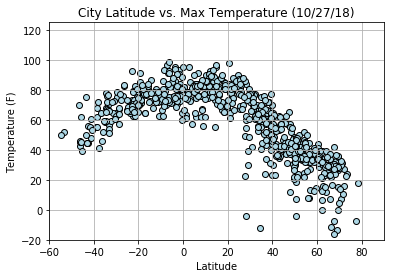

In [11]:
y1_axis=final_cities_df['Temperature (F)']
x_axis=final_cities_df["Latitude"]

plt.scatter(x_axis, y1_axis, c='lightblue', edgecolor='black', alpha=1 )
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-60, 90)
plt.ylim(-20, 125)
plt.grid()

plt.savefig("figure1")
plt.show()

#### Latitude vs. Humidity Plot

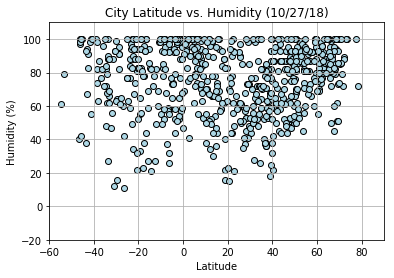

In [12]:
y2_axis=final_cities_df['Humidity (%)']
x_axis=final_cities_df["Latitude"]

plt.scatter(x_axis, y2_axis, c='lightblue', edgecolor='black', alpha=1 )
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 90)
plt.ylim(-20, 110) 
plt.grid()

plt.savefig("figure2")
plt.show()

#### Latitude vs. Cloudiness Plot

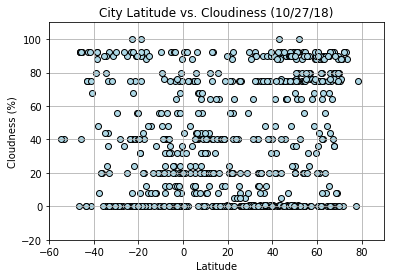

In [13]:
y3_axis=final_cities_df['Cloudiness (%)']
x_axis=final_cities_df["Latitude"]

plt.scatter(x_axis, y3_axis, c='lightblue', edgecolor='black', alpha=1 )
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudness (%)")
plt.xlim(-60, 90)
plt.ylim(-20, 110)
plt.grid()

plt.savefig("figure3")
plt.show()

#### Latitude vs. Wind Speed Plot

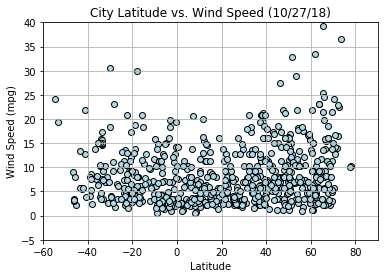

In [14]:
y4_axis=final_cities_df['Wind Speed (mph)']
x_axis=final_cities_df["Latitude"]

plt.scatter(x_axis, y4_axis, c='lightblue', edgecolor='black', alpha=1 )
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.xlim(-60, 90)
plt.ylim(-5, 40)
plt.grid()

plt.savefig("figure4")
plt.show()